![HeadHunter](https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg)

# <center> Проект: Анализ вакансий из HeadHunter
   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg
import requests
from bs4 import BeautifulSoup
from decouple import config


In [ ]:
# Параметры соединения
conf = f"postgresql://{config('USER')}:{config('PASSWORD')}@{config('HOST')}:{config('PORT')}/{config('DBNAME')}"


# Знакомство с данными

![Схема базы данных](images/Схема_базы_данных.png)


In [ ]:
# Функция для соединение с базой и выполнения запроса
def make_query(query, params=None):
    """
    Универсальная функция для выполнения SQL-запроса через psycopg3.

    - если запрос возвращает одну колонку и одну строку → возвращает скаляр
    - если запрос возвращает одну или несколько строк с несколькими колонками → возвращает DataFrame
    - если запрос неверный → возвращает текст ошибки
    """
    try:
        with psycopg.connect(conf) as conn:
            with conn.cursor() as cur:
                cur.execute(query, params)
                rows = cur.fetchall()
                if not rows:
                    return None

                # Если одна строка и одна колонка → скаляр
                if len(rows) == 1 and len(rows[0]) == 1:
                    return rows[0][0]

                # Иначе → DataFrame
                columns = (
                    [desc.name for desc in cur.description] if cur.description else None
                )
                return pd.DataFrame(rows, columns=columns)

    except psycopg.Error as e:
        # Собираем информативное сообщение об ошибке
        parts = [f"Ошибка выполнения запроса:\n{e.diag.message_primary}"]
        if e.diag.message_detail:
            parts.append(f"{e.diag.message_detail}")
        if e.diag.message_hint:
            parts.append(f"{e.diag.message_hint}")
        return "\n".join(parts)


In [ ]:
query_1 = f"""
SELECT * 
FROM vacancies
LIMIT 10
"""


In [6]:
make_query(query_1)


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,NaN,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,1955,1740
5,55906072,Корректор,Корректура текстов\tГрамотность\tРабота в кома...,Полный день,Нет опыта,Полная занятость,NaN,NaN,2323,584934
6,55523207,React Front-end Middle Developer,JavaScript\tTypeScript\tCSS3\tNode.js\tHTML5,Гибкий график,От 1 года до 3 лет,Полная занятость,NaN,NaN,2759,204511
7,55050261,Инженер-программист,Java SE\tSpring Framework\tSpring Boot\tGit\tS...,Полный день,Нет опыта,Полная занятость,40000.0,60000.0,49,4448636
8,55583432,Системный администратор,Linux\tАдминистрирование сетевого оборудования...,Полный день,От 1 года до 3 лет,Полная занятость,50000.0,NaN,3,55126
9,55312414,Ведущий специалист группы разработки систем,1С программирование\t1С: Предприятие 8\t1С: До...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,47,1413754


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [7]:
# текст запроса
query_3_1 = f"""SELECT COUNT(*) FROM vacancies"""


In [8]:
# результат запроса
count_vacancies = make_query(query_3_1)
print(count_vacancies)


49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [9]:
# текст запроса
query_3_2 = f"""SELECT COUNT(*) FROM employers"""


In [10]:
# результат запроса
count_employers = make_query(query_3_2)
print(count_employers)


23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [11]:
# текст запроса
query_3_3 = f"""SELECT COUNT(*) FROM areas"""


In [12]:
# результат запроса
count_areas = make_query(query_3_3)
print(count_areas)


1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [13]:
# текст запроса
query_3_4 = f"""SELECT COUNT(*) FROM industries"""


In [14]:
# результат запроса
count_industries = make_query(query_3_4)
print(count_industries)


294


***

In [15]:
# выводы по предварительному анализу данных
print(f"Общее количество вакансий: {count_vacancies}")
print(f"Общее количество работодателей: {count_employers}")
print(f"Общее количество регионов: {count_areas}")
print(f"Общее количество сфер деятельности: {count_industries}")


Общее количество вакансий: 49197
Общее количество работодателей: 23501
Общее количество регионов: 1362
Общее количество сфер деятельности: 294


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [16]:
# текст запроса
query_4_1 = f"""
SELECT 
    a.name area, 
    COUNT(v.id) cnt
FROM vacancies v 
RIGHT JOIN areas a ON a.id = v.area_id 
GROUP BY 1
ORDER BY 2 DESC
"""


In [17]:
# результат запроса
count_vac_area = make_query(query_4_1)
print(count_vac_area)


                                   area   cnt
0                                Москва  5333
1                       Санкт-Петербург  2851
2                                 Минск  2112
3                           Новосибирск  2006
4                                Алматы  1892
...                                 ...   ...
1357                         Багаевская     0
1358                         Пролетарск     0
1359                       Седельниково     0
1360                             Инской     0
1361  Белоярский (Свердловская область)     0

[1362 rows x 2 columns]


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [18]:
# текст запроса
query_4_2 = f"""
SELECT COUNT(*)
FROM vacancies
WHERE 
    (
        salary_from IS NOT NULL
        OR salary_to IS NOT NULL
    )
"""


In [19]:
# результат запроса
print(
    f"Количества вакансий у которых заполнено хотя бы одно из двух полей с зарплатой: {make_query(query_4_2)}"
)


Количества вакансий у которых заполнено хотя бы одно из двух полей с зарплатой: 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [20]:
# текст запроса
query_4_3 = f"""
SELECT 
    ROUND(AVG(salary_from), 0) AS mean_salary_from, 
    ROUND(AVG(salary_to), 0) AS mean_salary_to
FROM vacancies
"""


In [21]:
# результат запроса
mean_salary = make_query(query_4_3)
print(f"Среднее значение нижней границы зарплатной вилки: {mean_salary.iloc[0, 0]}")
print(f"Среднее значение верхней границы зарплатной вилки: {mean_salary.iloc[0, 1]}")


Среднее значение нижней границы зарплатной вилки: 71065
Среднее значение верхней границы зарплатной вилки: 110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [22]:
# текст запроса
query_4_4 = f"""
SELECT 
    schedule, 
    employment, 
    COUNT(*)
FROM vacancies
GROUP BY 1,2
ORDER BY 3 DESC
"""


In [23]:
# результат запроса
schedule_employment_count = make_query(query_4_4)
print(schedule_employment_count)


            schedule           employment  count
0        Полный день     Полная занятость  35367
1   Удаленная работа     Полная занятость   7802
2      Гибкий график     Полная занятость   1593
3   Удаленная работа  Частичная занятость   1312
4     Сменный график     Полная занятость    940
5        Полный день           Стажировка    569
6     Вахтовый метод     Полная занятость    367
7        Полный день  Частичная занятость    347
8      Гибкий график  Частичная занятость    312
9        Полный день     Проектная работа    141
10  Удаленная работа     Проектная работа    133
11     Гибкий график           Стажировка    116
12    Сменный график  Частичная занятость    101
13  Удаленная работа           Стажировка     64
14     Гибкий график     Проектная работа     18
15    Сменный график           Стажировка     12
16    Вахтовый метод     Проектная работа      2
17    Сменный график     Проектная работа      1


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [24]:
# текст запроса
query_4_5 = f"""
SELECT 
    experience, 
    COUNT(*)
FROM vacancies
GROUP BY 1
ORDER BY 2
"""


In [25]:
# результат запроса
experience_count = make_query(query_4_5)
print(experience_count)


           experience  count
0         Более 6 лет   1337
1           Нет опыта   7197
2       От 3 до 6 лет  14511
3  От 1 года до 3 лет  26152


***

## Выводы по детальному анализу вакансий

Всего в базе около 50 тыс. вакансий и бОльшая часть из них распределена по самым крупным городам. 

Желаемая заработная плата заполнена только у половины всех вакансий. Средняя минимальная желаемая зарплата равна 70 тыс. рублей, а средняя максимальная 110 тыс. 

Основная часть вакансий (95%) по типу графика и занятости предполагает полную занятость с разным вариантом графика ('Полный день', 'Удаленная работа', 'Гибкий график', 'Сменный график'), она составляет топ-5 всех вакансий с одним исключением, это - 'Удаленная работа' и 'Частичная занятость', при чем 'Полная занятость' и 'Полный день' составлет 35 тыс. вакансий (72%). 

Самый популярный требуемый опыт работы - 'От 1 года до 3 лет' (26 тыс. вакансий), а на последнем месте 'Более 6 лет' (1.3 тыс.)


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [26]:
# текст запроса
query_5_1 = f"""
(
    SELECT
        e.name,
        COUNT(*) AS vacancy_count
    FROM employers e
    JOIN vacancies v ON v.employer_id = e.id
    GROUP BY e.id
    ORDER BY 2 DESC
    OFFSET 0 LIMIT 1
)

UNION ALL

(
    SELECT
        e.name,
        COUNT(*) AS vacancy_count
    FROM employers e
    JOIN vacancies v ON v.employer_id = e.id
    GROUP BY e.id
    ORDER BY 2 DESC
    OFFSET 4 LIMIT 1
)
"""


In [27]:
# результат запроса
employer_stats = make_query(query_5_1)
print(employer_stats)


            name  vacancy_count
0         Яндекс           1933
1  Газпром нефть            331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [28]:
# текст запроса
query_5_2 = f"""
SELECT
    a.name,
    COALESCE(v.vacancy_count, 0) AS vacancy_count,
    COALESCE(e.employer_count, 0) AS employer_count
FROM areas a
LEFT JOIN 
    (
        SELECT
            area_id,
            COUNT(*) AS vacancy_count
        FROM vacancies
        GROUP BY 1
    ) v ON v.area_id = a.id
LEFT JOIN 
    (
        SELECT
            area,
            COUNT(*) AS employer_count
        FROM employers
        GROUP BY 1
    ) e ON e.area = a.id
ORDER BY 2, 3 DESC
"""


In [29]:
# результат запроса
area_employer_vacancys = make_query(query_5_2)
print(area_employer_vacancys)


                    name  vacancy_count  employer_count
0                 Россия              0             410
1              Казахстан              0             207
2     Московская область              0              75
3     Краснодарский край              0              19
4     Ростовская область              0              18
...                  ...            ...             ...
1357              Алматы           1892             721
1358         Новосибирск           2006             573
1359               Минск           2112            1115
1360     Санкт-Петербург           2851            2217
1361              Москва           5333            5864

[1362 rows x 3 columns]


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [30]:
# текст запроса
query_5_3 = f"""
SELECT
    e.name,
    COUNT(DISTINCT v.area_id) area_count
FROM employers e
LEFT JOIN vacancies v ON e.id = v.employer_id
GROUP BY 1
ORDER BY 2 DESC
"""


In [31]:
# результат запроса
employer_area_vacancies = make_query(query_5_3)
print(employer_area_vacancies)


                         name  area_count
0                      Яндекс         181
1                  Ростелеком         152
2                  Спецремонт         116
3      Поляков Денис Иванович          88
4                   ООО ЕФИН           71
...                       ...         ...
23170                  СДЕЛКА           0
23171            Alandr Group           0
23172                     СДК           0
23173      Lemon Land Lombard           0
23174                  Махина           0

[23175 rows x 2 columns]


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [32]:
# текст запроса
query_5_4 = f"""
SELECT
    COUNT(*)
FROM employers e
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL
"""


In [33]:
# результат запроса
employers_without_industry = make_query(query_5_4)
print(
    f"Количество работодателей, у которых не указана сфера деятельности: {employers_without_industry}"
)


Количество работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [34]:
# текст запроса
query_5_5 = f"""
SELECT
    e.name
FROM employers e
JOIN employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id
HAVING COUNT(DISTINCT ei.industry_id) = 4
ORDER BY 1
OFFSET 2 LIMIT 1
"""


In [35]:
# результат запроса
print(f"Третья компания с четырмя сферами деятельности: {make_query(query_5_5)}")


Третья компания с четырмя сферами деятельности: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [36]:
# текст запроса
query_5_6 = f"""
SELECT
    COUNT(*)
FROM employers_industries ei
JOIN industries i ON i.id = ei.industry_id
WHERE i.name = 'Разработка программного обеспечения'
"""


In [37]:
# результат запроса
print(
    f"Количества работодателей в сферы деятельности 'Разработка программного обеспечения': {make_query(query_5_6)}"
)


Количества работодателей в сферы деятельности 'Разработка программного обеспечения': 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [38]:
URL = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"

HEADERS = {"User-Agent": "Mozilla/5.0"}

# 1. Загружаем страницу
html = requests.get(URL, headers=HEADERS).text
soup = BeautifulSoup(html, "html.parser")

# 2. Берём первую таблицу
city_table = soup.find_all("table")[0]

# 3. Извлекаем названия городов
cities = []

for row in city_table.find_all("tr")[1:]:
    cells = row.find_all("td")
    cities.append(cells[1].text.strip())

# 4. Результат
print(cities)


['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [39]:
# текст запроса
query_5_7 = f"""
(
    SELECT
        a.name,
        COUNT(*) vacancy_count
    FROM vacancies v
    JOIN employers e ON e.id = v.employer_id
    JOIN areas a ON a.id = v.area_id
    WHERE 
        (
            e.name = 'Яндекс' 
            AND a.name = ANY(%s)
        )
    GROUP BY a.id
)

UNION ALL

(
    SELECT
        'Total',
        COUNT(*)
    FROM vacancies v
    JOIN employers e ON e.id = v.employer_id
    JOIN areas a ON a.id = v.area_id
    WHERE e.name = 'Яндекс'
)

ORDER BY 2
"""


In [40]:
# результат запроса
yandex_area_vacancies = make_query(query_5_7, params=(cities,))
print(yandex_area_vacancies)


               name  vacancy_count
0              Омск             21
1         Челябинск             22
2        Красноярск             23
3         Волгоград             24
4             Пермь             25
5            Казань             25
6    Ростов-на-Дону             25
7            Самара             26
8               Уфа             26
9         Краснодар             30
10          Воронеж             32
11      Новосибирск             35
12  Нижний Новгород             36
13     Екатеринбург             39
14  Санкт-Петербург             42
15           Москва             54
16            Total           1933


***

## Выводы по анализу работодателей

По количеству вакансий с большим отрывом лидирует компания 'Яндекс', почти 2 тыс. вакансий против 500 у второго места (Ростелеом). 

Вакансии распределены по городам, а компании и по городам, и по регионам/странам.

По количеству регионов с вакансиями так же лидируют Яндекс (181 регион) и Ростелеком (152 региона), так же есть много компаний вообще без вакансий.

У трети работодателей (8419 из 23175) не указана сфера деятельности.

Четверть вакансий Яндекса находится в городах миллионниках.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [41]:
# текст запроса
query_6_1 = f"""
SELECT
    COUNT(*)
FROM vacancies
WHERE name ILIKE ANY (ARRAY['%data%', '%данн%'])
"""


In [42]:
# результат запроса
print(f"Количества вакансий имеющих отношение к данным: {make_query(query_6_1)}")


Количества вакансий имеющих отношение к данным: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [43]:
# текст запроса
query_6_2 = f"""
SELECT
    COUNT(*)
FROM vacancies
WHERE 
    (
        name ILIKE ANY (ARRAY[
            '%data scientist%',
            '%data science%',
            '%machine learning%',
            '%исследователь данных%',
            '%машинн%обучен%'
        ])
        OR name ~* '(^|[^A-Za-zА-Яа-я0-9])[Mm][Ll]($|[^A-Za-zА-Яа-я0-9])'
    )
    AND
    (
        name ILIKE '%junior%'
        OR experience = 'Нет опыта'
        OR employment = 'Стажировка'
    )
"""


In [44]:
# результат запроса
print(f"Количество вакансий для начинающего дата-сайентиста: {make_query(query_6_2)}")


Количество вакансий для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [45]:
# текст запроса
query_6_3 = f"""
SELECT
    COUNT(*)
FROM vacancies
WHERE 
    (
        name ILIKE ANY (ARRAY[
            '%data scientist%',
            '%data science%',
            '%machine learning%',
            '%исследователь данных%',
            '%машинн%обучен%'
        ])
        OR name ~* '(^|[^A-Za-zА-Яа-я0-9])[Mm][Ll]($|[^A-Za-zА-Яа-я0-9])'
    )
    AND 
    (
        key_skills ILIKE ANY (ARRAY[
            '%sql%',
            '%postgres%'
        ])
    )
"""


In [46]:
# результат запроса
print(
    f"Количество вакансий для DS в которых в качестве ключевого навыка указан SQL или postgres: {make_query(query_6_3)}"
)


Количество вакансий для DS в которых в качестве ключевого навыка указан SQL или postgres: 195


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [47]:
# текст запроса
query_6_4 = f"""
SELECT
    COUNT(*)
FROM vacancies
WHERE 
(
    name ILIKE ANY (ARRAY[
        '%data scientist%',
        '%data science%',
        '%machine learning%',
        '%исследователь данных%',
        '%машинн%обучен%'
    ])
    OR name ~* '(^|[^A-Za-zА-Яа-я0-9])[Mm][Ll]($|[^A-Za-zА-Яа-я0-9])'
)
AND (key_skills ILIKE '%python%')
"""


In [48]:
# результат запроса
print(
    f"Количество вакансий для DS в которых в качестве ключевого навыка указан Python: {make_query(query_6_4)}"
)


Количество вакансий для DS в которых в качестве ключевого навыка указан Python: 344


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [49]:
# текст запроса
query_6_5 = f"""
SELECT
    ROUND(
        AVG(
            CARDINALITY(
                STRING_TO_ARRAY(key_skills, E'\t')
            )
        ),
        2
    )
FROM vacancies
WHERE
    (
        name ILIKE ANY (ARRAY[
            '%data scientist%',
            '%data science%',
            '%machine learning%',
            '%исследователь данных%',
            '%машинн%обучен%'
        ])
        OR name ~* '(^|[^A-Za-zА-Яа-я0-9])[Mm][Ll]($|[^A-Za-zА-Яа-я0-9])'
    )
"""


In [50]:
# результат запроса
print(
    f"{make_query(query_6_5)} ключевых навыков в среднем указывают в вакансиях для DS"
)


6.39 ключевых навыков в среднем указывают в вакансиях для DS


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос SELECT 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `SELECT 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [51]:
# текст запроса
query_6_6 = f"""
SELECT
    experience,
    ROUND(
        AVG(
            CASE
                WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL
                    THEN (salary_from + salary_to) / 2
                ELSE COALESCE(salary_from, salary_to)
            END
        ), 
        0
    ) AS avg_salary
FROM vacancies
WHERE
    (
        name ILIKE ANY (ARRAY[
            '%data scientist%',
            '%data science%',
            '%machine learning%',
            '%исследователь данных%',
            '%машинн%обучен%'
        ])
        OR name ~* '(^|[^A-Za-zА-Яа-я0-9])[Mm][Ll]($|[^A-Za-zА-Яа-я0-9])'
    )
    AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience
"""


In [52]:
# результат запроса
print(make_query(query_6_6))


           experience avg_salary
0           Нет опыта      74643
1  От 1 года до 3 лет     143417
2       От 3 до 6 лет     243115


***

## Выводы по предметному анализу

Общее количество вакансий имеющих отношение к данным - 1771, при этом вакансий для начинающего дата-сайентиста всего 51.

В среднем в вакансиях для DS указывают 6.39 ключевых навыков, SQL или postgres среди них - 195, а Python - 344.

Средняя зарплата в вакансиях для DS у сотрудников без опыта - 74643 рублей, с опытом от 1 года до 3 лет - 143417 рублей, а с опытом от 3 до 6 лет - 243115 рублей.

# Подведем итог исследования, обобщите выводы
Общее количество вакансий: 49197
Общее количество работодателей: 23501
Общее количество регионов: 1362
Общее количество сфер деятельности: 294

В базе присутсвует много пропусков: не у всех работодателей заполнена сфера деятельности и не у всех вакансий заполнена информация о зарплате.

Среднее значение нижней границы зарплатной вилки: 71065
Среднее значение верхней границы зарплатной вилки: 110537

Основная часть вакансий распределена по самым крупным городам и по типу графика и занятости предполагает полную занятость с разным вариантом графика. А среди компаний по количеству вакансий с большим отрывом лидирует 'Яндекс'.

Самый популярный требуемый опыт работы - 'От 1 года до 3 лет'

# Юнит 7. Дополнительные исследования данных


In [53]:
# Функция для построения универсального Pareto-графика


def plot_pareto(df, x_label, xtick_step=100, figsize=(12, 6)):
    """
    Универсальный Pareto-график:
    bar (log) + cum_share line

    df       — DataFrame с колонками:
               vacancy_count, cum_share
    x_label  — подпись оси X
    xtick_step — шаг для отображения xticks (по умолчанию 100)
    figsize  — размер графика (по умолчанию (12, 6))
    """

    df = df.reset_index(drop=True)

    fig, ax1 = plt.subplots(figsize=figsize)

    # --- BAR (логарифмическая шкала) ---
    ax1.bar(df.index, df["vacancy_count"], alpha=0.8)
    ax1.set_yscale("log")
    ax1.set_xlabel(x_label)
    ax1.set_ylabel("Количество вакансий (логарифмическая шкала)")
    ax1.grid(axis="y", alpha=0.4)
    ax1.grid(axis="x", alpha=0.2)

    ax1.set_xticks(range(0, len(df), xtick_step))

    # --- LINE (кумулятивная доля) ---
    ax2 = ax1.twinx()
    ax2.plot(df.index, df["cum_share"] * 100, linestyle="--", linewidth=2)

    ax2.set_ylabel("Кумулятивная доля вакансий, %")
    ax2.set_ylim(0, 110)
    ax2.set_yticks(range(0, 110, 10))
    ax2.grid(axis="y", linestyle="--", alpha=0.4)

    # --- Линия Парето 80% ---
    ax2.axhline(80, color="red", linestyle=":", linewidth=1.5, alpha=0.8)

    plt.title("Распределение вакансий (логарифмическая шкала + Pareto)")
    plt.tight_layout()

    plt.show()


## 1. У скольки работодателей есть вакансии, в скольки регионах есть вакансии?

In [54]:
# текст запроса
query_7_1 = f"""
SELECT 
    COUNT(DISTINCT employer_id) employer_count,
    COUNT(DISTINCT area_id) area_count
FROM vacancies        
"""


In [55]:
# результат запроса
make_query(query_7_1)


,employer_count,area_count
0,14906,769


### Вывод

Среди работодателей и регионов, включённых в базу, лишь часть имеет актуальные вакансии.

## 2. Какое распределение вакансий среди работодателей?

In [56]:
# текст запроса
query_7_2 = f"""
WITH value_counts AS (
    SELECT
        e.name,
        COUNT(*) AS vacancy_count
    FROM vacancies v
    JOIN employers e ON e.id = v.employer_id
    GROUP BY e.id
)
SELECT
    name,
    vacancy_count,
    SUM(vacancy_count) OVER (
        ORDER BY vacancy_count DESC, name
    )::float
    /
    SUM(vacancy_count) OVER () AS cum_share
FROM value_counts
ORDER BY vacancy_count DESC;
"""


In [57]:
# результат запроса
employers_vacancy_count = make_query(query_7_2)
employers_vacancy_count.head(20)


,name,vacancy_count,cum_share
0,Яндекс,1933,0.039291
1,Ростелеком,491,0.049271
2,Тинькофф,444,0.058296
3,СБЕР,428,0.066996
4,Газпром нефть,331,0.073724
5,ИК СИБИНТЕК,327,0.080371
6,МТС,292,0.086306
7,DataArt,247,0.091327
8,Совкомбанк Технологии,204,0.095473
9,Первый Бит,176,0.099051


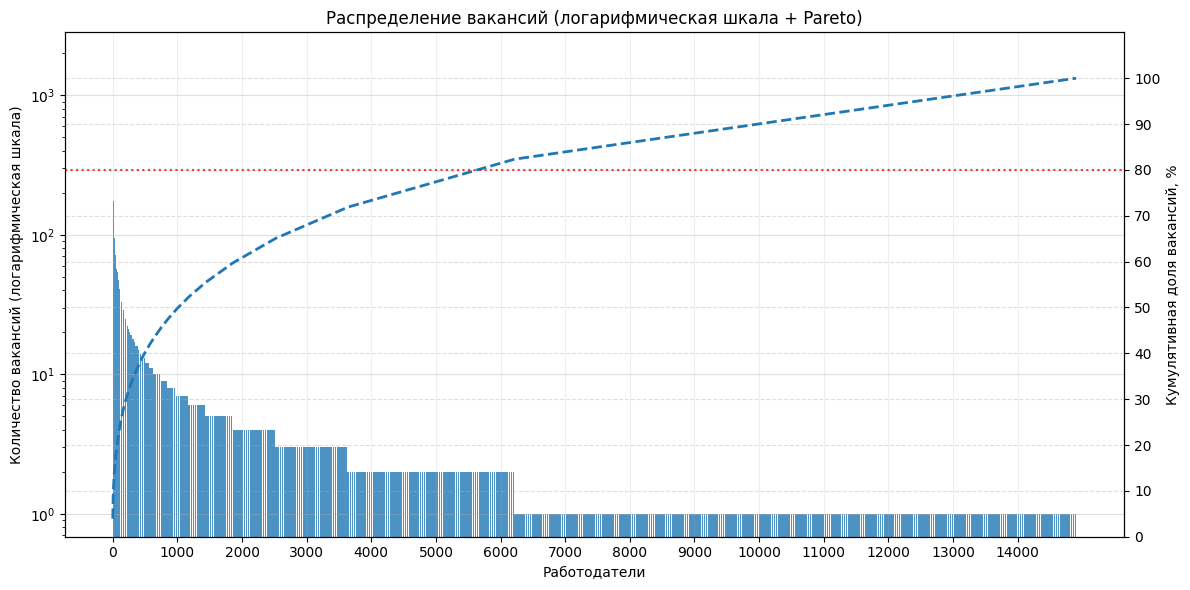

In [58]:
# Визуализация результата

plot_pareto(employers_vacancy_count, "Работодатели", 1000)


![Employers Chart](images/7-2.png)

### Вывод

**Основные выводы:**
1. **Высокая концентрация спроса у крупных работодателей.** Топ-1000 компаний формируют половину рынка вакансий, что делает их ключевыми игроками.
2. **Малые работодатели — «длинный хвост».** Большинство компаний (≈9000) имеют по 1 вакансии, что создаёт фрагментированный сегмент рынка.
3. **Доминирование определённых отраслей.** Лидеры по числу вакансий — банки, телеком и IT, что отражает структуру экономики и спрос на цифровые и финансовые услуги.
4. **Неравномерность рынка труда.** Дисбаланс между крупными и малыми работодателями влияет на:
   - **соискателей** (больше возможностей у лидеров, но выше конкуренция);
   - **рекрутеров** (необходимость работать с двумя сегментами — массовыми и нишевыми вакансиями);
   - **государство** (потребность в мерах поддержки малого бизнеса для создания рабочих мест).

**Практические рекомендации:**
- **Для соискателей:** фокусироваться на крупных работодателях для большего выбора, но рассматривать и малые компании для узкой специализации.
- **Для HR-специалистов:** разрабатывать разные стратегии найма для массового и нишевого сегментов.
- **Для государства:** стимулировать создание рабочих мест в малом бизнесе для балансировки рынка труда.

**Итог:** График наглядно демонстрирует **неравномерное распределение вакансий между работодателями**, что подтверждается как столбчатой диаграммой (количество вакансий по работодателям), так и кривой Парето (кумулятивная доля вакансий).


## 3. Какое распределение вакансий по регионам?

In [59]:
# текст запроса
query_7_3 = f"""
WITH value_counts AS (
    SELECT
        a.name,
        COUNT(*) AS vacancy_count
    FROM vacancies v
    JOIN areas a ON a.id = v.area_id
    GROUP BY a.id
)
SELECT
    name,
    vacancy_count,
    SUM(vacancy_count) OVER (
        ORDER BY vacancy_count DESC, name
    )::float
    /
    SUM(vacancy_count) OVER () AS cum_share,
    CASE
        WHEN name = ANY(%s)
            THEN 'Да'
        ELSE 'Нет'
    END AS russia_million_city
FROM value_counts
ORDER BY vacancy_count DESC;
"""


In [60]:
# результат запроса
area_vacancy_count = make_query(query_7_3, params=(cities,))
area_vacancy_count.head(20)


,name,vacancy_count,cum_share,russia_million_city
0,Москва,5333,0.108401,Да
1,Санкт-Петербург,2851,0.166352,Да
2,Минск,2112,0.209281,Нет
3,Новосибирск,2006,0.250056,Да
4,Алматы,1892,0.288514,Нет
5,Екатеринбург,1698,0.323028,Да
6,Нижний Новгород,1670,0.356973,Да
7,Казань,1415,0.385735,Да
8,Краснодар,1301,0.412180,Да
9,Самара,1144,0.435433,Да


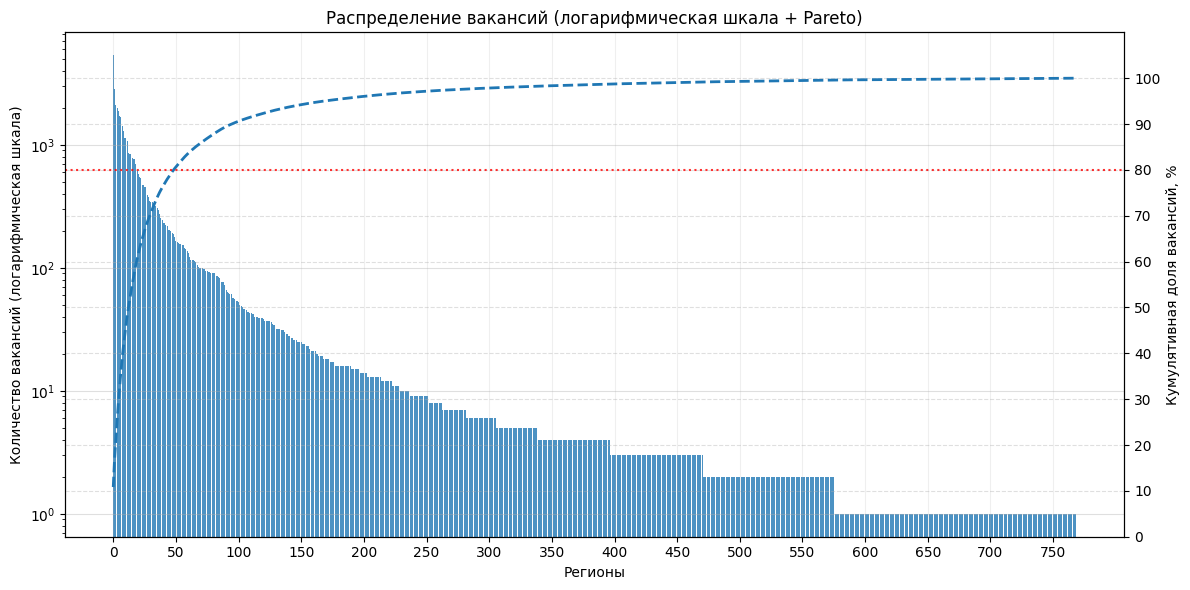

In [61]:
# Визуализация результата

plot_pareto(area_vacancy_count, "Регионы", 50)


![Areas Chart](images/7-3.png)

Вывод

По регионам распределение неравномерное: из 769 регионов с вакансиями 90% всех вакансий находится в 100 регионах, при этом топовыми регионами являются города-милионники России и стран СНГ.

**Общая картина распределения**

График демонстрирует **неравномерное распределение вакансий по регионам**. Использована **логарифмическая шкала** для оси Y («Количество вакансий»), что позволяет визуализировать данные с большим разбросом значений — от минимальных (порядка 10⁰) до максимальных (около 10³).

**Ключевая особенность: кривая Парето**

На графике присутствует **кривая Парето** (пунктирная линия), отражающая **кумулятивную долю вакансий в процентах** (ось Y справа). Она наглядно показывает, что:
* **небольшое число регионов** (левый участок графика, примерно первые 100 регионов по оси X) концентрирует **большую часть вакансий** (до 90% от общего числа);
* **остальные регионы** (правая часть графика) делят между собой **оставшиеся 10% вакансий**.

**Основные выводы**

* **Высокая концентрация вакансий в лидирующих регионах.** Это, крупные города и экономические центры (Москва, Санкт-Петербург, регионы с развитой IT- и промышленной инфраструктурой).
* **Длинный «хвост» маловостребованных регионов.** Множество регионов имеют незначительное число вакансий, что может указывать на:
    * нехватку рабочих мест;
    * менее развитый рынок труда;
    * специфику местных отраслей (преобладание сельского хозяйства, малого бизнеса).
* **Ярко выраженный дисбаланс.** Разница между лидерами и аутсайдерами по числу вакансий составляет несколько порядков (от 10³ до 10⁰).

**Практические последствия**

* **Для соискателей:**
    * наибольшие шансы найти работу — в топ-регионах;
    * в менее востребованных регионах может потребоваться переквалификация или переезд.
* **Для работодателей:**
    * фокус на ключевых регионах для массового найма;
    * возможность расширения присутствия в «хвостовых» регионах для снижения конкуренции за кадры.
* **Для государства:**
    * необходимость мер по выравниванию рынка труда (развитие местных предприятий, программы поддержки занятости);
    * анализ причин дисбаланса (инфраструктура, образование, отраслевая специфика).

**Итог:** график наглядно подтверждает **неравномерность распределения вакансий по регионам** с доминированием нескольких ключевых центров. Это требует дифференцированного подхода как со стороны соискателей и работодателей, так и со стороны органов власти для сбалансированного развития рынка труда.

## 4. Какое распределение вакансий по отраслям?

In [62]:
# текст запроса
query_7_4 = f"""
WITH value_counts AS (
    SELECT 
        i.name,
        COUNT(DISTINCT v.id) vacancy_count
    FROM vacancies v
    JOIN employers_industries ei ON ei.employer_id = v.employer_id
    JOIN industries i ON i.id = ei.industry_id
    GROUP BY i.id
)
SELECT
    name,
    vacancy_count,
    SUM(vacancy_count) OVER (
        ORDER BY vacancy_count DESC, name
    )::float
    /
    SUM(vacancy_count) OVER () AS cum_share
FROM value_counts
ORDER BY vacancy_count DESC;
"""


In [63]:
# результат запроса
industry_vacancy_count = make_query(query_7_4)
industry_vacancy_count.head(20)


,name,vacancy_count,cum_share
0,Разработка программного обеспечения,12499,0.156064
1,"Системная интеграция, автоматизации технологи...",11034,0.293836
2,"Интернет-компания (поисковики, платежные систе...",6413,0.373909
3,Банк,2742,0.408146
4,Мобильная связь,1585,0.427936
5,Кадровые агентства,1143,0.442208
6,Консалтинговые услуги,1137,0.456405
7,Интернет-провайдер,1095,0.470077
8,Розничная сеть (продуктовая),1034,0.482988
9,Фиксированная связь,1028,0.495823


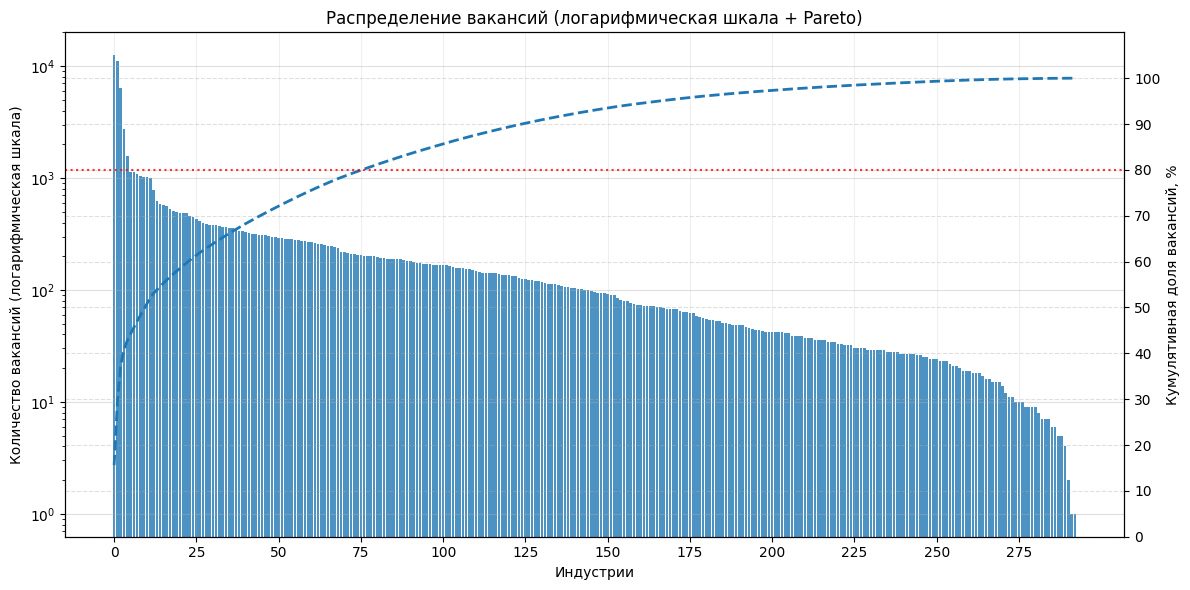

In [ ]:
# Визуализация результата

plot_pareto(industry_vacancy_count, "Индустрии", 25)


![Industries Chart](images/7-4.png)


### Сколько работодателей имеющих вакансии относятся к нескольким сферам деятельности


In [65]:
# текст запроса
query_7_41 = f"""
SELECT 
    industries_cnt,
    COUNT(*) AS employers_cnt
FROM
(
    SELECT
        e.id,
        COALESCE(COUNT(DISTINCT ei.industry_id), 0) AS industries_cnt
    FROM employers e
    FULL JOIN employers_industries ei ON ei.employer_id = e.id
    JOIN vacancies v ON v.employer_id = e.id
    GROUP BY 1
    ORDER BY 2 DESC
) AS employers_industries_count
GROUP BY 1
ORDER BY 2 DESC
"""


In [66]:
# результат запроса
make_query(query_7_41)


,industries_cnt,employers_cnt
0,0,4959
1,1,4324
2,2,2447
3,3,1655
4,5,795
5,4,726


### Вывод

Подавляющее большинство работодателей работает в 1-2 отраслях, что свидетельствует о высокой степени специализации на рынке труда.

**Ключевые выводы**

* **Высокая концентрация спроса в узком круге отраслей:** большинство вакансий приходится на топ-сегменты (ИТ, финансы, связь, ритейл и т. п.), что отражает структуру экономики.
* **Длинный «хвост» низковостребованных индустрий:** множество отраслей имеют незначительное число вакансий, что усложняет поиск работы в нишевых сферах.
* **Потенциал для анализа дисбаланса:** график помогает выявить отрасли с дефицитом кадров (высокие столбцы) и сегменты с избытком предложения (низкие столбцы).
* **Практическое применение кривой Парето:** работодатели и рекрутеры могут фокусироваться на топ-20% отраслей для массового найма, а специалисты — оценивать перспективы в зависимости от востребованности направления.

**Возможные интерпретации**

* **Для соискателей:** ориентироваться на лидирующие отрасли для быстрого трудоустройства, но учитывать конкуренцию.
* **Для HR-специалистов:** оптимизировать ресурсы, концентрируясь на ключевых секторах.
* **Для государства/образовательных учреждений:** адаптировать программы обучения под спрос (увеличить подготовку кадров для топовых отраслей).

**Итог:** график наглядно демонстрирует неравномерность распределения вакансий по отраслям, подтверждая принцип Парето и помогая выявить приоритетные сегменты рынка труда.

## 5. В каких индсутриях больше зарплата

Берем индустрии в которых от 5 и больше вакансии

In [67]:
# текст запроса
query_7_5 = """
SELECT
    i.name AS industry_name,
    COUNT(*) AS vacancy_count,
    ROUND(AVG(COALESCE(salary_from, 0)), 0) AS avg_salary_from,
    ROUND(AVG(COALESCE(salary_to, 0)), 0) AS avg_salary_to,
    ROUND(
        AVG(
            CASE
                WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL
                    THEN (salary_from + salary_to) / 2
                ELSE COALESCE(salary_from, salary_to)
            END
        ), 
        0
    ) AS avg_salary
FROM employers_industries ei
JOIN vacancies v ON ei.employer_id = v.employer_id
JOIN industries i ON i.id = ei.industry_id
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
GROUP BY i.id
HAVING COUNT(*) >= 5
ORDER BY avg_salary DESC
LIMIT 20
"""


In [68]:
# результат запроса
make_query(query_7_5)


,industry_name,vacancy_count,avg_salary_from,avg_salary_to,avg_salary
0,"Агрохимия (продвижение, оптовая торговля)",14,374286,7143,381429
1,Агрохимия (производство),16,338625,5000,339875
2,Игорный бизнес,20,81396,114933,191905
3,Корма для животных (производство),29,136024,180056,168300
4,Зоомагазин,31,137419,168452,167613
5,Кадровые агентства,711,95535,98559,144530
6,"Лакокрасочная продукция, сырье (производство)",26,85769,80976,142803
7,"Бытовая химия, парфюмерия, косметика (произво...",78,120083,26218,130120
8,"Лакокрасочная продукция, сырье (продвижение, о...",32,81558,74074,128445
9,"Дорожно-строительная техника, сельскохозяйстве...",90,24556,104289,122878


### Вывод

Высокие зарплаты не коррелируют с количеством вакансий - самые высокооплачиваемые отрасли (агрохимия) имеют наименьшее количество вакансий, тогда как массовый IT-сектор предлагает умеренные зарплаты при огромном количестве позиций.

**Диспропорция между 'от' и 'до'**

  - Агрохимия: колоссальный разрыв (374,286₽ от vs 7,143₽ до)

  - Ветеринария: 113,171₽ от vs 1,923₽ до

**Это может означать:** ошибки в данных, специфическую структуру оплаты (большие бонусы), разные позиции в одной категории

**Самая массовая отрасль** - Разработка ПО (4,572 вакансии). Средняя зарплата - 117,659₽ (13-е место). Вывод: IT - самый активный рынок, но не самый высокооплачиваемый

**Рекомендации для дальнейшего анализа:**

  - Верифицировать данные - проверить аномальные значения

  - Добавить медианные значения - средние могут быть искажены выбросами

## 6. Какой опыт востребован больше всего


In [69]:
# текст запроса
query_7_6 = f"""
SELECT
    experience,
    COUNT(*) AS vacancy_count
FROM vacancies
GROUP BY 1
ORDER BY 2 DESC
"""


In [70]:
# результат запроса
make_query(query_7_6)


,experience,vacancy_count
0,От 1 года до 3 лет,26152
1,От 3 до 6 лет,14511
2,Нет опыта,7197
3,Более 6 лет,1337


### Вывод

Анализ данных демонстрирует **выраженную асимметрию** в спросе на специалистов разного уровня опыта. Рынок труда ориентирован преимущественно на кандидатов со стажем **от 1 до 3 лет**, при резком снижении потребности в новичках и высококвалифицированных кадрах.

**Ключевые наблюдения**

1. **Абсолютный лидер — категория «от 1 до 3 лет»**  
   - **26 152 вакансии** (≈60 % от общего числа).  
   - Это ядро рынка труда: работодатели активно ищут специалистов, уже имеющих базовую практику, но ещё не требующих высоких зарплат.

2. **Существенный спад для более опытных кадров**  
   - «От 3 до 6 лет»: **14 511 вакансий** (≈33 %).  
   - Спрос падает почти в **1,8 раза** по сравнению с предыдущей группой.  
   - Вероятно, это связано с ростом зарплатных ожиданий и узкой специализацией.

3. **Ограниченные возможности для новичков**  
   - «Нет опыта»: **7 197 вакансий** (≈16 %).  
   - Несмотря на относительно высокое число предложений, конкуренция здесь будет жёстче из‑за большого числа соискателей.

4. **Минимизированный спрос на экспертов**  
   - «Более 6 лет»: **1 337 вакансий** (≈3 %).  
   - Это в **19,5 раз меньше**, чем для группы «от 1 до 3 лет».  
   - Причины:  
     - дефицит топовых позиций,  
     - высокие зарплатные требования,  
     - узкая специализация ролей.

**Выявленные тенденции**

- **Пирамидальная структура спроса.**  
  Рынок выстраивается как «перевёрнутая пирамида»: максимум вакансий на среднем уровне опыта, резкое сужение к вершинам (новички и эксперты).

- **Фокус на «готовых» специалистов.**  
  Работодатели предпочитают кандидатов, уже прошедших адаптацию, но ещё не достигших пиковых зарплатных ожиданий.

- **Барьер для карьерного роста.**  
  Переход от 3 к 6+ годам опыта сопровождается **падением количества вакансий в 10,8 раза**, что может создавать «узкие места» в карьерных траекториях.


**Практические выводы**

1. **Для соискателей:**  
   - Наибольшие шансы на трудоустройство — у специалистов с опытом **1–3 года**.  
   - Новички должны быть готовы к высокой конкуренции.  
   - Опытным кандидатам (6+ лет) стоит фокусироваться на редких нишевых позициях или управленческие роли.

2. **Для работодателей:**  
   - Дефицит кадров с опытом 3+ лет может требовать:  
     - программ удержания сотрудников,  
     - инвестиций в обучение,  
     - гибких условий для экспертов.  
   - Для привлечения новичков — акцент на стажировки и адаптационные программы.

3. **Для рынка труда:**  
   - Дисбаланс указывает на **риск «кадрового провала»**:  
     - избыток новичков,  
     - нехватка специалистов среднего звена,  
     - острый дефицит экспертов.  
   - Требуется балансировка через образовательные и карьерные инициативы.

**Итог:** рынок труда демонстрирует **сильный перекос в пользу кандидатов со стажем 1–3 года**. Для устойчивого развития отрасли необходимо:  
- снижать барьеры входа для новичков,  
- создавать условия для роста специалистов среднего уровня,  
- сохранять мотивацию для экспертов.

## 7. Чем выше опыт — тем больше требований (количество навыков)

In [71]:
# текст запроса
query_7_7 = f"""
SELECT
    experience,
    PERCENTILE_CONT(0.5) WITHIN GROUP (
        ORDER BY CARDINALITY(
            STRING_TO_ARRAY(key_skills, E'\t')
        )
    ) AS median_skills_count,
    ROUND(
        AVG(
            CARDINALITY(
                STRING_TO_ARRAY(key_skills, E'\t')
            )
        ),
        2
    ) AS avg_skills_count
FROM vacancies
WHERE key_skills IS NOT NULL
GROUP BY 1
ORDER BY 3
"""


In [72]:
# результат запроса
make_query(query_7_7)


,experience,median_skills_count,avg_skills_count
0,Нет опыта,5.0,6.06
1,От 1 года до 3 лет,5.0,6.38
2,От 3 до 6 лет,5.0,6.41
3,Более 6 лет,5.0,6.95


### Вывод

Анализ данных демонстрирует **слабую положительную динамику** в среднем количестве навыков (`avg_skills_count`) по мере роста профессионального опыта, при этом медианное значение (`median_skills_count`) остаётся неизменным на всём диапазоне.

**Ключевые наблюдения**

1. **Стабильность медианного показателя**  
   - Во всех категориях опыта медианное количество навыков составляет **5,0**.  
   - Это означает, что **половина работодателей* в каждой группе указывает **не более 5 навыков** в вакансиях, независимо от стажа.

2. **Расхождение медианы и среднего**  
   - Во всех группах среднее значение превышает медиану на **1,0–1,95**.  
   - Это указывает на **правостороннюю асимметрию**: часть работодателей указывает значительно больше навыков, чем основная масса, что «подтягивает» среднее вверх.

**Интерпретация тенденций**

- **Начальный этап карьеры** (без опыта):  
  - Работодатели в среднем указывают **6,06 навыков**, но половина ограничивается **5 навыками**.  
  - Вероятно, это базовые компетенции из образования или стажировок.

- **Средний опыт** (1–6 лет):  
  - Незначительный рост среднего (до **6,41**), но медиана неизменна.  
  - Карьерное развитие на этом этапе может идти за счёт углубления существующих навыков, а не их количественного наращивания.

- **Высокий опыт** (более 6 лет):  
  - Заметный скачок среднего до **6,95** при той же медиане.  
  - Предполагает, что опытные специалисты либо:  
    - осваивают смежные компетенции,  
    - указывают более детализированный набор навыков,  
    - включают управленческие/методологические навыки.

**Выводы**

1. **Количество навыков растёт медленно.** За 6+ лет карьеры среднее число навыков увеличивается лишь на **15 %**, что говорит о:  
   - высокой специализации,  
   - фокусе на глубине знаний, а не на их широте.

2. **Медиана как «ядро» компетенций.** Значение **5,0** во всех группах может отражать:  
   - стандартный набор ключевых навыков для профессии,  
   - тенденцию указывать только самые релевантные умения.

3. **Роль «аутлайеров».** Превышение среднего над медианой показывает, что:  
   - часть работодателей активно расширяет портфолио навыков,  
   - на рынке есть запрос на мультидисциплинарность (особенно для опытных кадров).

**Практические рекомендации**

- **Для соискателей:**  
  - На старте карьеры важно чётко выделить **5–6 ключевых навыков**.  
  - С ростом опыта стоит документировать смежные компетенции для повышения конкурентоспособности.

- **Для работодателей:**  
  - Ожидать резкого увеличения числа навыков с ростом стажа не стоит — фокус на глубине важнее.  
  - При отборе опытных кандидатов обращать внимание на **разнообразие** навыков, а не только на их количество.

**Итог:** данные подтверждают гипотезу о постепенном, но не линейном наращивании навыков в течение карьеры. Основной массив специалистов сохраняет стабильный набор из 5 ключевых компетенций, тогда как лидеры рынка выделяются за счёт расширенного портфолио.

## 8. В каких индустриях больше всего вакансий без опыта

In [73]:
# текст запроса
query_7_8 = f"""
SELECT
    i.name AS industry_name,
    COUNT(DISTINCT v.id) AS vacancy_count
FROM vacancies v
JOIN employers_industries ei
    ON ei.employer_id = v.employer_id
JOIN industries i
    ON i.id = ei.industry_id
WHERE v.experience = 'Нет опыта'
GROUP BY i.id, i.name
ORDER BY vacancy_count DESC
LIMIT 20
"""


In [74]:
# результат запроса
make_query(query_7_8)


,industry_name,vacancy_count
0,"Интернет-компания (поисковики, платежные систе...",1930
1,Разработка программного обеспечения,1225
2,"Системная интеграция, автоматизации технологи...",1217
3,Мобильная связь,369
4,Интернет-провайдер,320
5,Оптоволоконная связь,303
6,Фиксированная связь,286
7,Банк,191
8,Консалтинговые услуги,186
9,"Маркетинговые, рекламные, BTL, дизайнерские, E...",126


### Вывод

Анализ демонстрирует **чёткую концентрацию возможностей для начинающих специалистов в IT и телекоммуникационном секторе**.

**Основные наблюдения**

1. **Абсолютное лидерство IT‑сектора**  
   Первые 3 позиции (суммарно **4 372 вакансии**) занимают сугубо IT‑направления:
   - Интернет‑компании (поисковики, платёжные системы) — **1 930**  
   - Разработка ПО — **1 225**  
   - Системная интеграция и автоматизация — **1 217**  
   Это **62 % от общего числа вакансий** в выборке, что подчёркивает высокую доступность стартовых позиций в IT.

2. **Сильный телеком‑сегмент**  
   Следующие 4 строки (телеком‑компании) дают ещё **1 367 вакансий** (≈19 %):
   - Мобильная связь — **369**  
   - Интернет‑провайдеры — **320**  
   - Оптоволоконная связь — **303**  
   - Фиксированная связь — **286**  
   Телеком активно нанимает начинающих, хотя и с заметным отрывом от IT.

3. **Низкий спрос в не‑IT‑отраслях**  
   Для остальных сфер характерно резкое снижение количества вакансий:
   - Банки — **191**  
   - Консалтинг — **186**  
   - Маркетинг/реклама — **126**  
   - Розничная торговля — **115**  
   - Госструктуры — **98**  
   Эти отрасли предлагают в **3–10 раз меньше** стартовых позиций, чем лидеры.

4. **Минимальные возможности в производственных и сервисных сегментах**  
   Отраслям типа производства металлоконструкций, электрооборудования, колл‑центров соответствует **51–76 вакансий**. Это сигнализирует о:
   - низкой потребности в новичках,  
   - жёстких требованиях к квалификации,  
   - узкой специализации ролей.

**Выявленные тенденции**

- **Резкий разрыв между топ‑7 и остальными отраслями.** После 7‑й позиции (банк, 191 вакансия) количество предложений падает более чем в 2 раза.  
- **Концентрация возможностей в цифровом секторе.** На IT и телеком приходится **~81 % всех вакансий** для начинающих.  
- **Повторяющиеся категории.** Дублирование названий (например, «Электронно‑вычислительная…» в строках 13 и 16) может указывать на несовершенство классификации данных.

**Практические выводы**

1. **Для соискателей без опыта:**  
   - Наибольшие шансы — в **IT (интернет‑компании, разработка ПО, интеграция)** и **телекоме**.  
   - В не‑IT‑секторах конкуренция за стартовые позиции будет выше из‑за ограниченного числа вакансий.  

2. **Для работодателей:**  
   - IT и телеком формируют основной спрос на новичков, что может усиливать дефицит кадров в других отраслях.  
   - Не‑IT‑компании рискуют терять талантливых кандидатов из‑за малого числа предложений для начинающих.

3. **Для рынка труда:**  
   - Дисбаланс между секторами указывает на **структурный перекос** — большинство стартовых возможностей сосредоточено в цифровом сегменте.  
   - Это может стимулировать переток кадров в IT, даже если их профиль изначально не связан с технологиями.

**Итог:** рынок вакансий «без опыта» крайне поляризован. IT и телеком выступают главными «входными точками» для новичков, тогда как остальные отрасли предлагают существенно меньше возможностей для старта карьеры.

# Общий вывод по проекту

В ходе проекта был проведён анализ рынка вакансий на основе базы вакансий с использованием SQL и последующей аналитической интерпретации результатов.

1. Распределение вакансий по работодателям

Рынок вакансий характеризуется высокой концентрацией спроса: около половины всех вакансий приходится на топ-1000 работодателей, тогда как большинство компаний публикуют единичные позиции. Такое распределение имеет выраженный «длинный хвост» и отражает неравномерную структуру рынка труда с доминированием крупных компаний в ключевых отраслях.

2. Географическое распределение вакансий

Распределение вакансий по регионам имеет **сильную асимметрию**:

* несколько крупных городов формируют основную часть рынка,
* большинство регионов представлены единичными вакансиями.

Распределение близко к **логнормальному**, что типично для экономических и социальных процессов. Для анализа использовалась логарифмическая шкала и комбинированная визуализация (bar + line).

3. Зарплаты

Средние зарплаты зависят от уровня опыта, однако расчёт средней зарплаты требует аккуратной логики:

* учёта частично заполненных полей,
* корректной агрегации,
* использования `COALESCE` и `CASE`.

Применение этих конструкций позволило получить корректные и интерпретируемые оценки.

4. Опыт работы

Анализ показал, что:

* наибольшее число вакансий приходится на начальные и средние уровни опыта;
* вакансии без опыта сосредоточены в ограниченном числе индустрий;
* увеличение требуемого опыта **не приводит к росту типового числа требований**, но увеличивает долю вакансий с расширенными требованиями.

Это подтверждается тем, что медианное количество навыков остаётся постоянным, тогда как среднее значение растёт.

5. Навыки и требования

Типовой набор требований к вакансиям стабилен, однако:

* для позиций с более высоким опытом чаще встречаются вакансии с расширенным списком навыков;
* рынок сегментирован: массовые позиции и нишевые вакансии с высокими требованиями.

---

Итоговая интерпретация

Рынок вакансий в области данных характеризуется:

* высокой концентрацией по регионам и работодателям,
* стабильными базовыми требованиями,
* ростом сложности требований не за счёт массы вакансий, а за счёт небольшого числа перегруженных позиций.

Проект демонстрирует умение:

* корректно формулировать SQL-запросы,
* работать с текстовыми и числовыми полями,
* выбирать адекватные метрики,
* интерпретировать результаты с учётом структуры данных и ограничений источника.
